In [1]:
rep_gzip = "../../data/sac_gzip/s2rhai2021pwii/s2rhai2021pwii.tar.gz"
import obspy

In [2]:
def rename_data(tr, station=None, network=None, location=None, channel=None):
    """
    To rename trace

    :param tr: Set Trace to rename
    :type tr: obspy.trace
    :param station: Set new station name, defaults to None
    :type station: str, optional
    :param network: Set new network name, defaults to None
    :type network: str, optional
    :param location: Set new location name, defaults to None
    :type location: str, optional
    :param channel: Set new channel name, defaults to None
    :type channel: str, optional
    :return: return the new trace
    :rtype: obspy.trace
    """
    if station is not None:
        tr.stats.station = station
    if network is not None:
        tr.stats.network = network
    if location is not None:
        tr.stats.location = location
    if channel is not None:
        tr.stats.channel = channel
    return tr
    
    

['LO', 'LODA2', '00', 'EHE.sac']
['LO', 'LOVI', '00', 'EHE.sac']
['CU', 'SDDR', '00', 'BHZ.sac']
['LO', 'LODU1', '00', 'EHE.sac']
['CN', 'LGNH', '', 'HHN.sac']
['CW', 'QMBU', '00', 'HHN.sac']
['AM', 'R3397', '00', 'EHZ.sac']
['AM', 'R897D', '00', 'EHZ.sac']
['AM', 'RCE1F', '00', 'EHZ.sac']
['LO', 'LONE3', '00', 'EHE.sac']
['CW', 'QMBU', '00', 'HHZ.sac']
['AM', 'R595E', '00', 'EHZ.sac']
['LO', 'LOBH', '00', 'EHE.sac']
['CN', 'LGNH', '', 'HNZ.sac']
['AM', 'R50D4', '00', 'EHZ.sac']


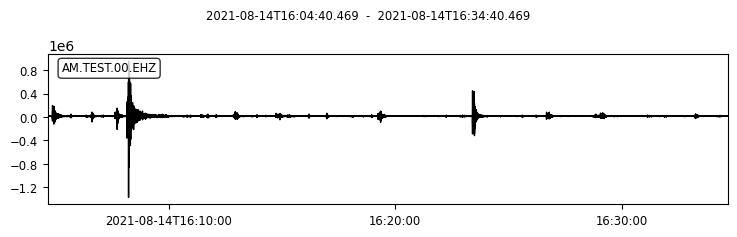

OSError: bad operation for mode 'r'

In [3]:
import tarfile
sta = "R50D4"
import io

bytesIO = io.BytesIO()

t = tarfile.open(rep_gzip, 'r:gz')
for finfo in t.getmembers():
    info = finfo.name.split("_")
    print(info)
    if info[1] == sta:
       fileobj = t.extractfile(finfo)
       st = obspy.read(fileobj)
       for tr in st:
           rename_data(tr, station="TEST")
       st.plot()   
       st.write("tmp.sac", format='SAC')
       #print(bytesIO)
       #file_info = tarfile.TarInfo(name="foo")
       #file_info.size=len(bytesIO.buf)
       t.add("./tmp.sac", os.path.basename("./tmp.sac"))
       

#f = tarfile.open("test.tar.gz", 'w:gz')
#f.add("./tmp.sac", os.path.basename("./tmp.sac"))
t.close()
    

In [4]:
import os
import glob
import shutil


def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        

def compress(archive_name, source_dir):
    print("Compressing files to %s..." % archive_name)
    tar = tarfile.open(archive_name, "w:gz")
    for file_name in glob.glob(os.path.join(source_dir, "*")):
        print("  Adding %s..." % file_name)
        tar.add(file_name, os.path.basename(file_name))
    tar.close()


def decompress(archive_name, dest_dir):
    print("Decompressing files to %s..." % dest_dir)
    shutil.rmtree(dest_dir)
    create_dir(dest_dir)
    tar = tarfile.open(archive_name, "r:gz")
    for tarinfo in tar:
        tar.extract(tarinfo, dest_dir)
    tar.close()

In [16]:
def print_info_stream_in_targz(targz_file):
    t = tarfile.open(targz_file, 'r:gz')
    for finfo in t.getmembers():
        #print(finfo.name)
        if finfo.name.split("_")[0] == "AM":
            print(finfo.name)
            
        #fileobj = t.extractfile(finfo)
        #st = obspy.read(fileobj)
        #print(st)
        

def test_network_in_tar_file(targz_file, net="AM"):
    t = tarfile.open(targz_file, 'r:gz')
    for finfo in t.getmembers():
        if finfo.name.split("_")[0] == net:
            return True
    return False

test_network_in_tar_file(rep_gzip,  net="AM")

True

In [6]:
tarbz2 = tarfile.open('rep_gzip', 'w:tar.gz')
info = tarfile.TarInfo('premiers.txt')
info.size = len(premiers)
tarbz2.addfile(info, io.BytesIO(premiers))
tarbz2.close()

CompressionError: unknown compression type 'tar.gz'

In [7]:
#!python3
#coding=utf-8
"""
Replace a file in a .tar.gz archive via temporary files
"""

import sys        #
import pathlib    # https://docs.python.org/3/library/pathlib.html
import tempfile   # https://docs.python.org/3/library/tempfile.html
import tarfile    # https://docs.python.org/3/library/tarfile.html


gfn = "/Users/ambrois/Documents/01_Scripts/sds_tools/data_tools/test.tar.gz"
iext = ".sac"

def add_file(archive_name, file):
    """Extract archive to temporary directory, replace file, replace archive """
    # tempdir
    with tempfile.TemporaryDirectory() as td:
        # dirname to Path
        tdp = pathlib.Path(td)

        # extract archive to temporry directory
        with tarfile.open(archive_name) as r:
            r.extractall(td)
            
        # replace archive, from all files in tempdir
        with tarfile.open(archive_name, "w:gz") as w:
            for f in tdp.iterdir():
                w.add(f, arcname=f.name)
            w.add(file, arcname=os.path.basename(file))
    #done

if __name__ == "__main__":
    add_file(rep_gzip, "./tmp.sac")